In [1]:
#import required packages to explore the data
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import statsmodels.api as sm


In [2]:
#import ProFootball Reference Player Stats
RPSData = pd.read_csv(r"C:\Users\PFR_HistoricalStats.csv")
                      #, index_col = 'Player')

## View the Imported Source Data

In [3]:
RPSData.head()

,Player,Year,Tm,FantPos,Age,G,GS,Cmp,Pass_Att,Yds_G_Pass,...,Tot_TD,2PM,2PP,FantPt,PPR,DKPt,FDPt,VBD,PosRank,OvRank
0,Todd Gurley,2017,LAR,RB,23,15,15,0,0,0,...,19,NaN,NaN,319.0,383.3,391.3,351.3,192.0,1,1.0
1,Le'Veon Bell,2017,PIT,RB,25,15,15,0,0,0,...,11,NaN,NaN,257.0,341.6,349.6,299.1,130.0,2,2.0
2,Alvin Kamara,2017,NOR,RB,22,16,3,0,0,0,...,14,1.0,NaN,239.0,320.4,327.4,279.9,112.0,4,4.0
3,Kareem Hunt,2017,KAN,RB,22,16,16,0,0,0,...,11,NaN,NaN,242.0,295.2,302.2,268.7,115.0,3,3.0
4,Melvin Gordon,2017,LAC,RB,24,16,16,0,0,0,...,12,NaN,NaN,230.0,288.1,294.1,259.1,103.0,5,5.0


In [4]:
RPSData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2442 entries, 0 to 2441
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Player      2442 non-null   object 
 1   Year        2442 non-null   int64  
 2   Tm          2442 non-null   object 
 3   FantPos     2205 non-null   object 
 4   Age         2442 non-null   int64  
 5   G           2442 non-null   int64  
 6   GS          2442 non-null   int64  
 7   Cmp         2442 non-null   int64  
 8   Pass_Att    2442 non-null   int64  
 9   Yds_G_Pass  2442 non-null   int64  
 10  Pass_TD     2442 non-null   int64  
 11  Int         2442 non-null   int64  
 12  Rush_Att    2442 non-null   int64  
 13  Rush_Yds_G  2442 non-null   int64  
 14  Y/A         1297 non-null   float64
 15  Rush_TD     2442 non-null   int64  
 16  Tgt         2442 non-null   int64  
 17  Rec         2442 non-null   int64  
 18  Rec_Yds     2442 non-null   int64  
 19  Y/R         1882 non-null  

In [5]:
#Filter table to view only stats and fantasy points related to NFL Running Backs
RPSData = RPSData.loc[RPSData['FantPos'] == 'RB', ['Player', 'Year', 'Rush_Att', 'Tgt', 'Rec', 'Tot_TD']]

# RPSData = RPSData.drop ('FantPos', axis = 1)

# RPSData['PPR'] = pd.to_numeric(RPSData['PPR'], errors = 'coerce')
# RPSData['PPR'] = RPSData['PPR'].replace(np.nan,0)

In [6]:
RPSData.head()

,Player,Year,Rush_Att,Tgt,Rec,Tot_TD
0,Todd Gurley,2017,279,87,64,19
1,Le'Veon Bell,2017,321,106,85,11
2,Alvin Kamara,2017,120,100,81,14
3,Kareem Hunt,2017,272,63,53,11
4,Melvin Gordon,2017,284,83,58,12


In [7]:
RPSData = RPSData.set_index(['Year', 'Player'],drop = True)
RPSData.head(220)

Rush_Att  Tgt  Rec  Tot_TD
Year Player                                   
2017 Todd Gurley         279   87   64      19
     Le'Veon Bell        321  106   85      11
     Alvin Kamara        120  100   81      14
     Kareem Hunt         272   63   53      11
     Melvin Gordon       284   83   58      12
...                      ...  ...  ...     ...
2018 Spencer Ware         51   23   20       2
     Chris Ivory         115   21   13       1
     Ty Montgomery        41   40   25       1
     Rashaad Penny        85   12    9       2
     Alfred Morris       111   13    8       2

[220 rows x 4 columns]

In [8]:
RPSData.describe()

,Rush_Att,Tgt,Rec,Tot_TD
count,619.000000,619.000000,619.000000,619.000000
mean,72.546042,22.723748,17.232633,2.954766
std,80.197445,25.040219,19.474924,3.846726
min,0.000000,0.000000,0.000000,0.000000
25%,8.000000,4.000000,3.000000,0.000000
50%,41.000000,13.000000,9.000000,1.000000
75%,116.500000,35.000000,25.500000,5.000000
max,378.000000,142.000000,116.000000,21.000000


## Data Preprocessing
#### Standardize the data, apply Principal Component Analysis and the Elbow Method

In [9]:
scaler = StandardScaler()
scaler.fit(RPSData)
X_scale = scaler.transform(RPSData)
df_scale = pd.DataFrame(X_scale, columns = RPSData.columns, index = RPSData.index)
df_scale.head()

Rush_Att       Tgt       Rec    Tot_TD
Year Player                                               
2017 Todd Gurley    2.576403  2.568996  2.403357  4.174513
     Le'Veon Bell   3.100534  3.328389  3.482539  2.093141
     Alvin Kamara   0.592193  3.088581  3.276980  2.873656
     Kareem Hunt    2.489048  1.609763  1.838071  2.093141
     Melvin Gordon  2.638799  2.409124  2.095019  2.353313

In [10]:
pca = PCA()
pca.fit(X_scale)

PCA()

In [11]:
pca.explained_variance_ratio_

array([0.80775926, 0.14765496, 0.04297035, 0.00161543])

Text(0, 0.5, 'Cumulative Explained Variance')

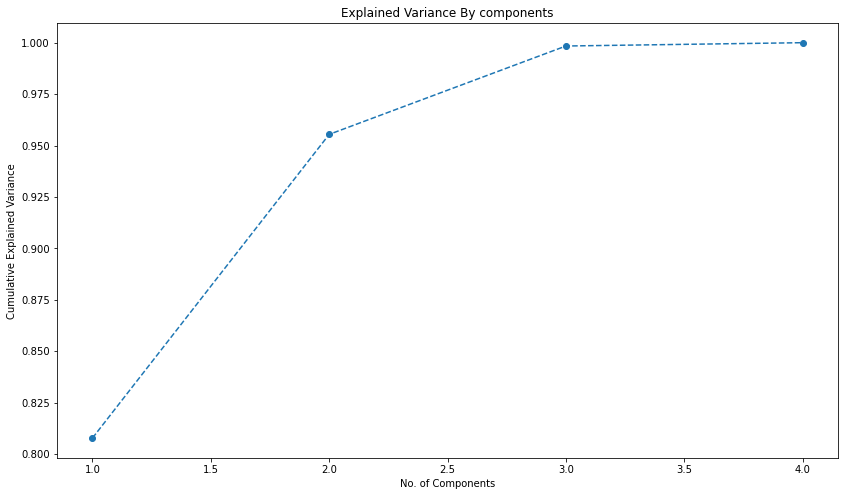

In [14]:
plt.figure(figsize = (14,8))
plt.plot(range(1,5), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.title('Explained Variance By components')
plt.xlabel('No. of Components')
plt.ylabel('Cumulative Explained Variance')

__Due to the high dimensionality of the data, principal component analysis was performed to reduce noise and increase the efficiency of the algorithm. The above plot indicates 3 components will explain the majority of the variance in the features.__

In [15]:
pca = PCA(n_components = 3)


In [16]:
pca.fit(X_scale)

PCA(n_components=3)

In [17]:
pca.transform(X_scale)

array([[ 5.84329709e+00,  9.88204217e-01,  1.14457561e+00],
       [ 6.01606098e+00, -5.51759978e-01, -8.30319357e-01],
       [ 4.97804962e+00, -1.41513461e+00,  1.44517040e+00],
       ...,
       [-1.66596279e+00, -6.83822690e-02,  1.11026714e-01],
       [-1.72780045e+00,  1.75426199e-03,  1.08721462e-01],
       [-1.68070154e+00, -4.23437286e-02,  1.04613560e-01]])

In [18]:
scores_pca = pca.transform(X_scale)

In [19]:
wcss=[]
for i in range(1,9):
    kmeans_pca = KMeans(n_clusters = i, init = 'k-means++', random_state = 1)
    kmeans_pca.fit(scores_pca)
    wcss.append(kmeans_pca.inertia_)

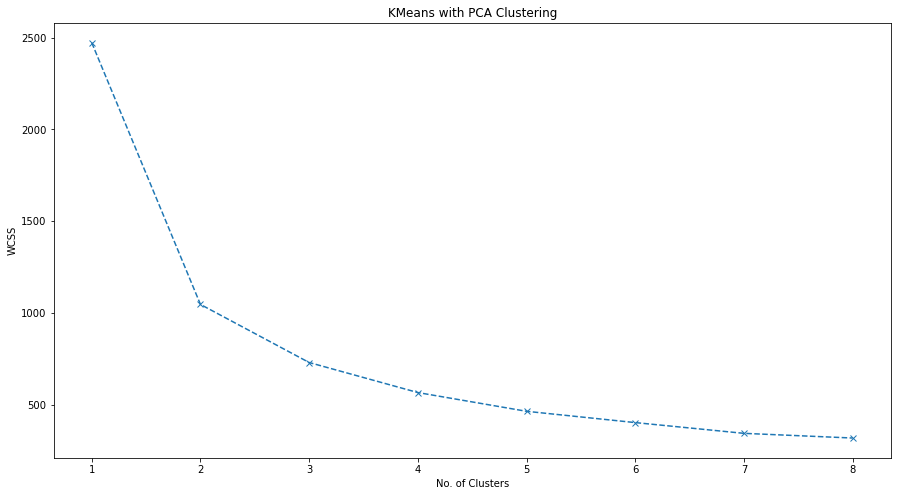

In [20]:
plt.figure(figsize = (15,8))
plt.plot(range(1,9), wcss, marker = 'x', linestyle = '--')

#style the output
plt.title('KMeans with PCA Clustering')
plt.xlabel('No. of Clusters')
plt.ylabel('WCSS')
plt.show()

__The Elbow plot above implies 3 clusters will be optimal for the K-Means algorithm.__

## Perform K-means Clustering Algorithm

In [21]:
kmeans_pca = KMeans(n_clusters = 3, init = 'k-means++', random_state = 1)

In [22]:
kmeans_pca.fit(scores_pca)

KMeans(n_clusters=3, random_state=1)

In [23]:
clusters = kmeans_pca.predict(scores_pca) 

### Calculate the averages for the input feature for each of the 3 clusters

In [24]:
RPSData['Feature Average'] = RPSData[['Rush_Att', 'Tgt', 'Rec', 'Tot_TD']].mean(axis = 1)

ClusterAvg = RPSData.groupby(kmeans_pca.labels_).mean().transpose()
ClusterAvg.head(7)

,0,1,2
Rush_Att,22.174863,207.784615,123.851064
Tgt,7.193989,73.953846,35.244681
Rec,5.281421,57.015385,26.744681
Tot_TD,0.729508,10.661538,4.622340
Feature Average,8.844945,87.353846,47.615691


__The above data frame shows that the best players fall into cluster 1, average players are located in cluster2, and the wors players are in cluster 0.__

## Add cluster column to the original dataframe and label the clusters

In [25]:
df_pca_kmeans = pd.concat([RPSData.reset_index(drop=False), pd.DataFrame(scores_pca)], axis = 1)

#df_pca_kmeans = pd.DataFrame(X_scale, columns = RPSCopy.columns, index = RPSCopy.index)
df_pca_kmeans.columns.values[-3: ] = ['Component 1', 'Component 2', 'Component 3']
df_pca_kmeans['KMeans PCA'] = kmeans_pca.labels_
df_pca_kmeans = df_pca_kmeans.set_index(['Year', 'Player'],drop = True)

In [26]:
df_pca_kmeans.head()

Rush_Att  Tgt  Rec  Tot_TD  Feature Average  Component 1  \
Year Player                                                                    
2017 Todd Gurley         279   87   64      19           112.25     5.843297   
     Le'Veon Bell        321  106   85      11           130.75     6.016061   
     Alvin Kamara        120  100   81      14            78.75     4.978050   
     Kareem Hunt         272   63   53      11            99.75     3.990854   
     Melvin Gordon       284   83   58      12           109.25     4.735606   

                    Component 2  Component 3  KMeans PCA  
Year Player                                               
2017 Todd Gurley       0.988204     1.144576           1  
     Le'Veon Bell     -0.551760    -0.830319           1  
     Alvin Kamara     -1.415135     1.445170           1  
     Kareem Hunt       0.717633    -0.268839           1  
     Melvin Gordon     0.418169    -0.225678           1

In [27]:
df_pca_kmeans['Player Grouping'] = df_pca_kmeans['KMeans PCA'].map({0:'Worst Players', 1:'Best Players', 2:'Average Players'})
df_pca_kmeans.tail()

Rush_Att  Tgt  Rec  Tot_TD  Feature Average  \
Year Player                                                           
2020 Jonathan Williams         1    4    4       0             2.25   
     Tony Brooks-James         3    0    0       0             0.75   
     Bruce Miller              0    2    1       0             0.75   
     Qadree Ollison            1    0    0       0             0.25   
     Adrian Killins            1    1    1       0             0.75   

                        Component 1  Component 2  Component 3  KMeans PCA  \
Year Player                                                                 
2020 Jonathan Williams    -1.539405    -0.174638     0.092290           0   
     Tony Brooks-James    -1.715937     0.016026     0.092036           0   
     Bruce Miller         -1.665963    -0.068382     0.111027           0   
     Qadree Ollison       -1.727800     0.001754     0.108721           0   
     Adrian Killins       -1.680702    -0.042344     0.104614           0   

                       Player Grouping  
Year Player                             
2020 Jonathan Williams   Worst Players  
     Tony Brooks-James   Worst Players  
     Bruce Miller        Worst Players  
     Qadree Ollison      Worst Players  
     Adrian Killins      Worst Players

In [28]:
#Export model results to excel
df_pca_kmeans.to_excel (r'C:\Users\KMeansRB_PredModel_NOPPR.xlsx', index = True, header=True)

## Visualize the Clusters

C:\Users\ashle\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Clusters By PCA Components')

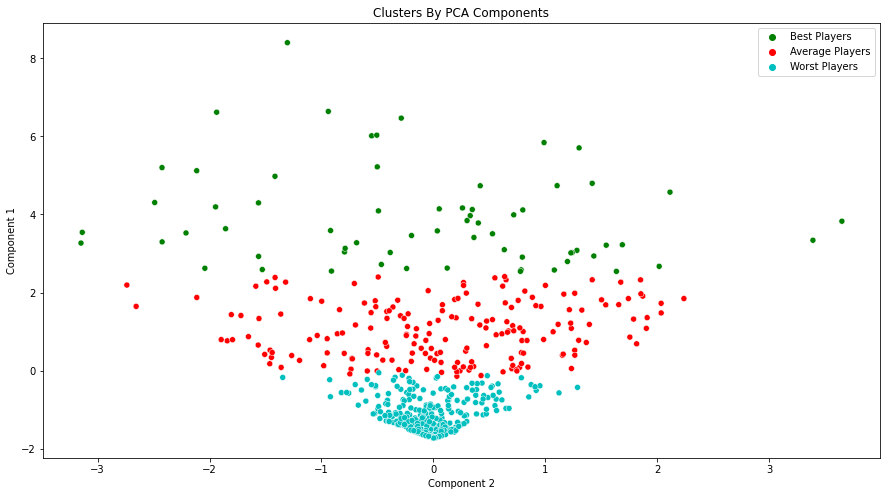

In [29]:
plt.figure(figsize = (15,8))
x_axis = df_pca_kmeans['Component 2']
y_axis = df_pca_kmeans['Component 1']
sns.scatterplot(x_axis,y_axis, hue = df_pca_kmeans['Player Grouping'], palette = ['g','r','c'])

plt.legend()
plt.title('Clusters By PCA Components')
